In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import os
import zipfile
local_zip = '/content/drive/MyDrive/ML Project/traffic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/extracted')
zip_ref.close()

In [ ]:
batch_size = 50
img_height = 224
img_width = 224

In [ ]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/extracted/data/train',
    seed=1337,
    image_size= (img_height, img_width),
    batch_size=batch_size)

test = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/extracted/data/test',
    seed=1337,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/extracted/data/val',
    seed=1337,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [ ]:
class_names = train.class_names

NameError: ignored

In [ ]:
img_shape = (img_height, img_width, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
history = model.fit(train, validation_data = validation, epochs = 100)

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

NameError: ignored

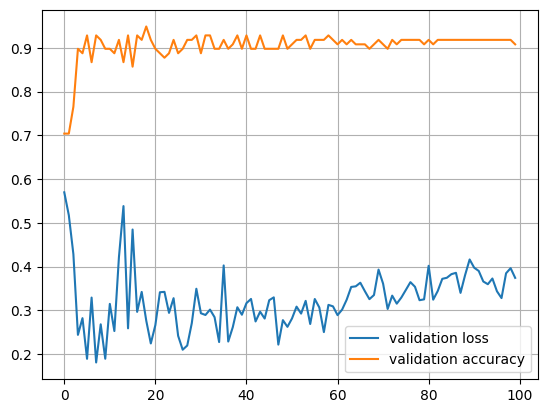

In [ ]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in test.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

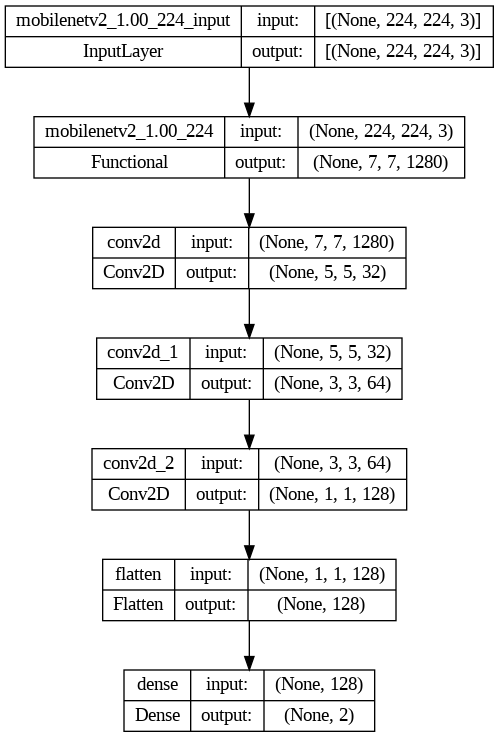

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [ ]:
import cv2
image=[]
label=[]
cap = cv2.VideoCapture('/content/drive/MyDrive/traffic_data/VID_DATA/Accidental/Snapinsta.app_video_348265556_5947318915397883_7388751301044656754_n.mp4')
count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        count += 30
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    else:
        cap.release()
        break

Accident Detected
AxesImage(size=(1280, 720))


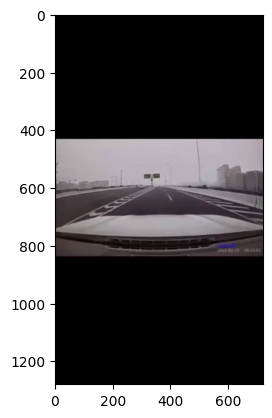

In [ ]:
print(label[1])
print(plt.imshow(image[1]))